In [1]:
pip install pyecharts

You should consider upgrading via the '/Users/jungin/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install folium

     |████████████████████████████████| 95 kB 5.2 MB/s eta 0:00:011
You should consider upgrading via the '/Users/jungin/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [47]:
#library
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts.charts import Map,Geo
from pyecharts import options as opts
from pyecharts.globals import ThemeType
import warnings
warnings.filterwarnings("ignore")
import matplotlib.gridspec as gs

#plotly
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import plotly.express as px

import chart_studio
import plotly.graph_objects as go

#folium
import folium

In [22]:
df1 = pd.read_csv('2015.csv')
df2 = pd.read_csv('2016.csv')
df3 = pd.read_csv('2017.csv')
df4 = pd.read_csv('2018.csv')

In [31]:
df1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [30]:
df2.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
#2019년도 행복지수 데이터
df = pd.read_csv('2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


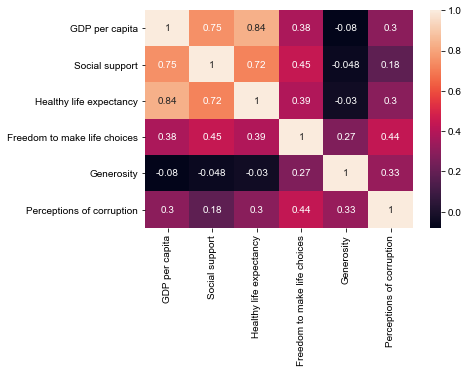

In [7]:
#HeatMap 사용 - 상관관계 분석
df_corr = df[["GDP per capita" , "Social support", "Healthy life expectancy" , "Freedom to make life choices", "Generosity" , "Perceptions of corruption"]]
correlation_mat = df_corr.corr()
sns.heatmap(correlation_mat, annot = True)
sns.set(rc = {'figure.figsize':(8,5)})
plt.show()

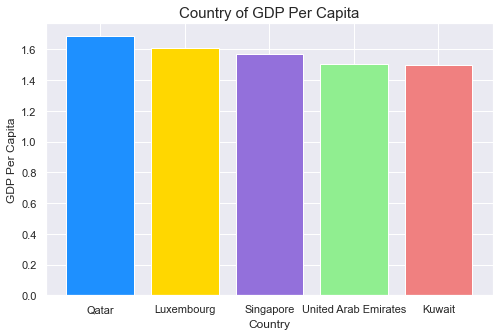

In [9]:
# BarChart 사용 - 1인당 GDP가 높은 TOP5 나라
gdp_df = df.sort_values(['GDP per capita'], ascending = False)
gdp_df = gdp_df.head(5) #5위까지만
plt.bar(gdp_df['Country or region'], gdp_df['GDP per capita'],color=['dodgerblue','gold','mediumpurple','lightgreen','lightcoral'])
plt.title('Country of GDP Per Capita',fontsize=15)
plt.xlabel('Country')
plt.ylabel('GDP Per Capita')
plt.show()

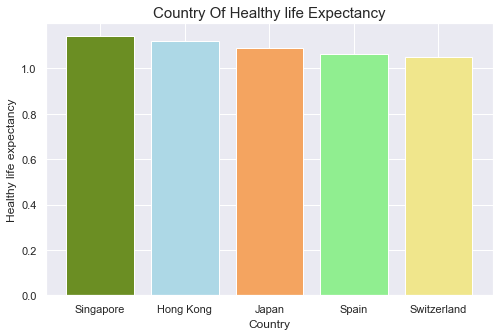

In [11]:
# BarChart 사용 - 기대수명지수 높은 TOP5 나라
gdp_df = df.sort_values(['Healthy life expectancy'], ascending = False)
gdp_df = gdp_df.head(5) #5위까지만
plt.bar(gdp_df['Country or region'], gdp_df['Healthy life expectancy'],color=['olivedrab','lightblue','sandybrown','lightgreen','khaki'])
plt.title('Country Of Healthy life Expectancy',fontsize=15)
plt.xlabel('Country')
plt.ylabel('Healthy life expectancy')
plt.show()

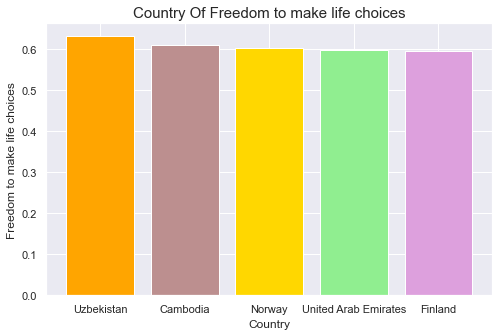

In [13]:
# BarChart 사용 - 선택의 자유도가 높은 TOP5 나라
gdp_df = df.sort_values(['Freedom to make life choices'], ascending = False)
gdp_df = gdp_df.head(5) #5위까지만
plt.bar(gdp_df['Country or region'], gdp_df['Freedom to make life choices'],color=['orange','rosybrown','gold','lightgreen','plum'])
plt.title('Country Of Freedom to make life choices',fontsize=15)
plt.xlabel('Country')
plt.ylabel('Freedom to make life choices')
plt.show()

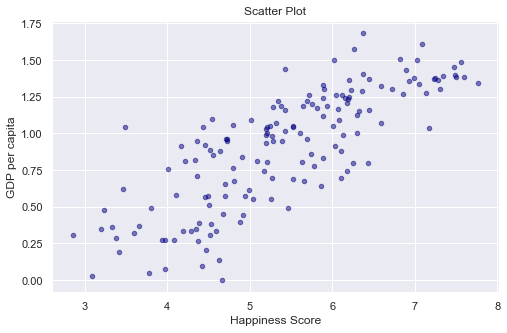

In [14]:
#Scatter Plot 사용 - 1인당 GDP와 행복지수 관계 
df.plot(kind = "scatter", x= "Score", y ="GDP per capita", alpha= 0.5, color = "navy")
plt.xlabel("Happiness Score")
plt.ylabel("GDP per capita")
plt.title("Scatter Plot")
plt.show()

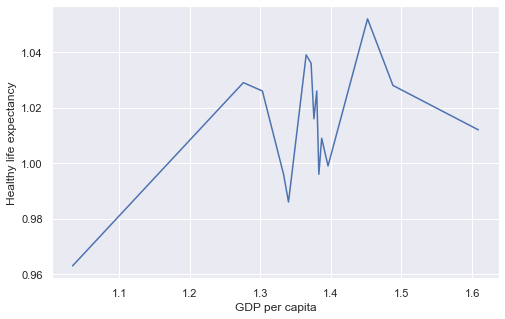

In [15]:
sns.lineplot(data = df.head(15), x = "GDP per capita", y = "Healthy life expectancy")
sns.set(rc = {'figure.figsize':(10,7)})
plt.show()

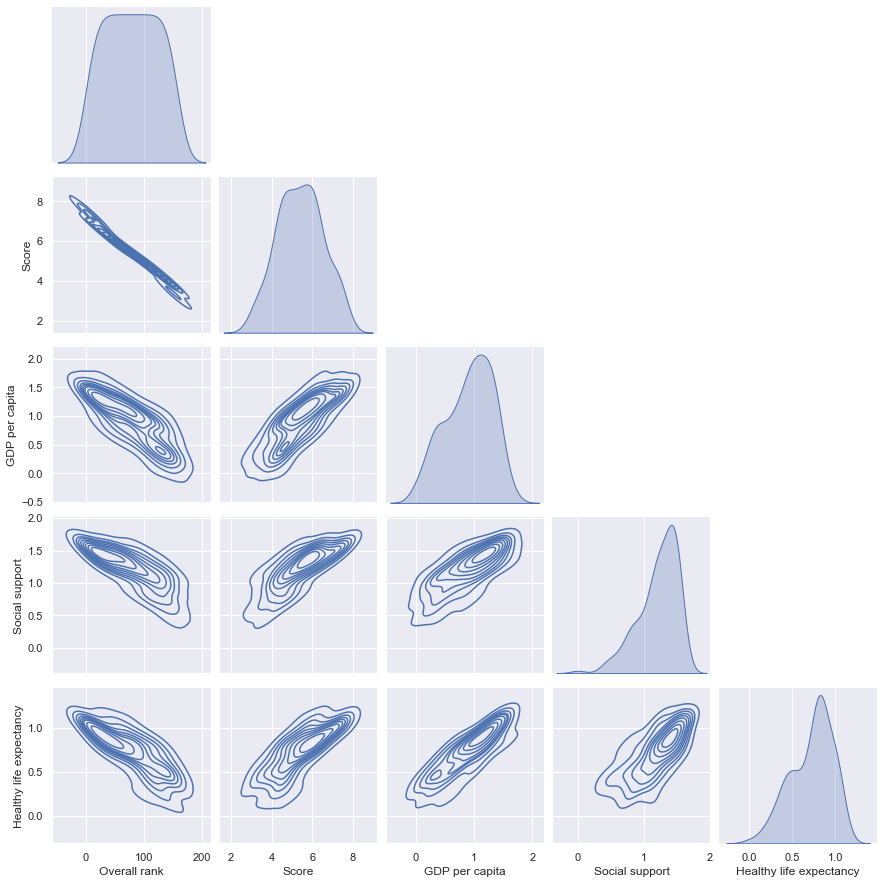

In [16]:
#PairPlot kde 사용 - 지정 컬럼별 데이터 밀집도 파악
sns.pairplot(df, vars = ['Overall rank','Score','GDP per capita','Social support','Healthy life expectancy'],kind = 'kde',corner = True) 

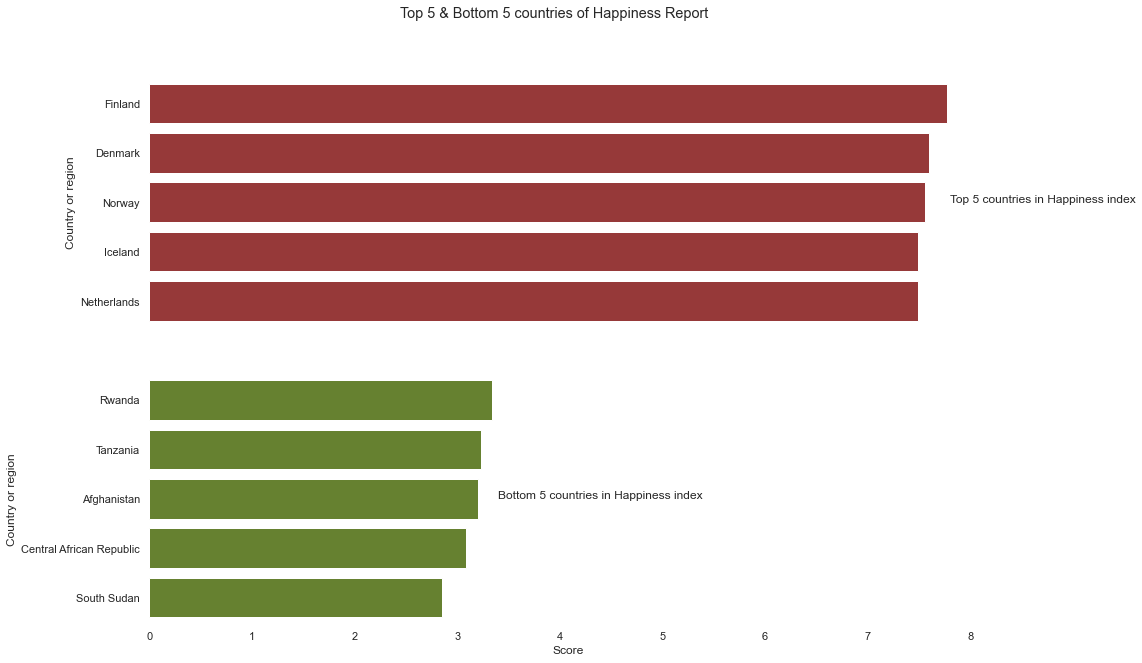

In [17]:
#Barplot 사용 - Top5와 Bottom5
fig= plt.figure(figsize=(15,10))
g=gs.GridSpec(ncols=1, nrows=2, figure=fig)
plt.suptitle("Top 5 & Bottom 5 countries of Happiness Report")
ax1=plt.subplot(g[0,0])
topc=df.head(5)
botc= df.tail(5)

#top5
ax1=sns.barplot(data=topc, x=topc['Score'],y=topc['Country or region'], color='brown')
ax1.xaxis.set_visible(False)
ax1.annotate("Top 5 countries in Happiness index",xy=(7.8,2))
plt.gca().set_facecolor('white')
#bottom5
ax2=plt.subplot(g[1,0], sharex=ax1)
ax2=sns.barplot(data=botc, x=botc['Score'],y=botc['Country or region'], color='olivedrab')
ax2.annotate("Bottom 5 countries in Happiness index",xy=(3.4,2))
plt.gca().set_facecolor('white')

for s in ['left','right','top','bottom']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

for c in ax1.containers:
    labels = [v.get_width() for v in c]
    
for c in ax2.containers:
    labels = [v.get_width() for v in c]


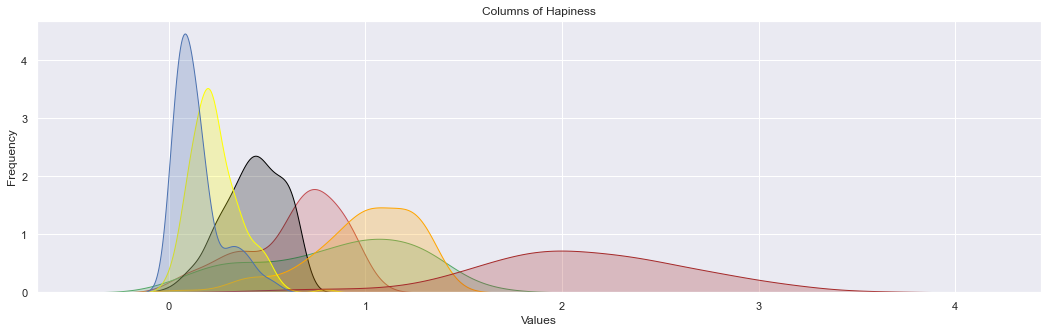

In [56]:
#kdeplot 사용 - 2015년도 컬럼별 빈도
plt.figure(figsize=(18,5))
sns.kdeplot(df1['Health (Life Expectancy)'],shade=True,color='r')
sns.kdeplot(df1['Economy (GDP per Capita)'],shade=True,color='g')
sns.kdeplot(df1['Freedom'],shade=True,color='black')
sns.kdeplot(df1['Family'],shade=True,color='orange')
sns.kdeplot(df1['Generosity'],shade=True,color='yellow')
sns.kdeplot(df1['Dystopia Residual'],shade=True,color='brown')
sns.kdeplot(df1['Trust (Government Corruption)'],shade=True,color='b')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Columns of Hapiness')
plt.show()

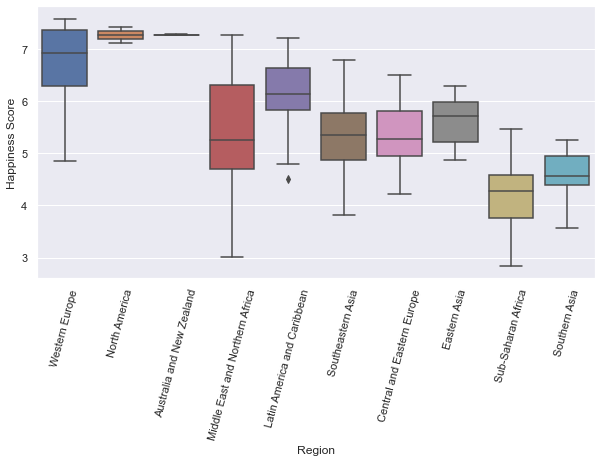

In [59]:
#boxplot사용 - 지역별 Happiness Score
plt.figure(figsize=(10,5))
sns.boxplot(x=df1['Region'],y=df1['Happiness Score'])
plt.xticks(rotation=75)
plt.show()

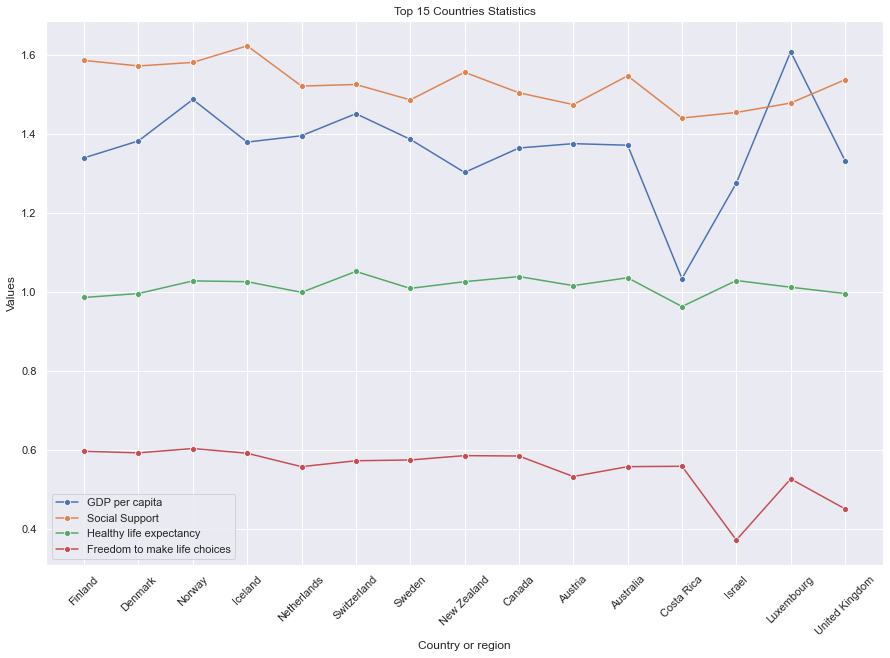

In [18]:
#LinePlot사용 
plt.figure(figsize=(15,10))
sns.lineplot(data=df[:15],x="Country or region",y="GDP per capita",marker='o',label='GDP per capita')
sns.lineplot(data=df[:15],x="Country or region",y="Social support",marker='o',label='Social Support')
sns.lineplot(data=df[:15],x="Country or region",y="Healthy life expectancy",marker='o',label='Healthy life expectancy ')
sns.lineplot(data=df[:15],x="Country or region",y="Freedom to make life choices",marker='o',label='Freedom to make life choices')
plt.xticks(rotation = 45)
plt.ylabel('Values')
plt.title('Top 15 Countries Statistics')
plt.legend()
plt.show()

In [36]:
#Scatter사용 
import plotly.express as px
happiest_countries = df.groupby(['Country or region'], sort = False)['Score', 'GDP per capita'].max()
top10 = happiest_countries.sort_values('Score', ascending = False)[:15]
fig = px.scatter(top10,
                x = top10.index,
                y = 'Score',
                size = 'GDP per capita',
                color = top10.index,
                template = 'xgridoff',
                title = 'TOP 15')
fig.show()

In [25]:
#Map Plots사용 - 2019 세계행복지수 지도
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        marker_line_width=1,
        locations = df['Country or region'],
        locationmode = "country names",
        z = df['Score'],
        text = df['Country or region'],
        colorbar = {'title' : 'Happiness Score'},
        
      )
layout = dict(title = ' 2019 World Happiness Map ',
              geo = dict(projection = {'type':'mercator'}, showocean = False, showlakes = True, showrivers = True, )
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [32]:
#Pie Charts사용 - 2016년도 나라 지역 분포도
pie1 = df2.Country.value_counts()
labels = df2.Region

# figure
fig = {
  "data": [
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "",
      "hoverinfo":"label+percent+name",
      "hole": .2,
      "type": "pie"
    },],
  "layout": {
        "title":"Distribution of Countries by Regions",
        "annotations": [
            { "font": { "size": 25},
              "showarrow": True,
              "text": "Regions",
                "x": 1,
                "y": 1,
            },
        ]
    }
}
iplot(fig)

In [75]:
#Folium - 2019년도 미국의 분포
df['Country'] = df['Country or region'].replace("United States", "United States of America")

state_geo = os.path.join("./", 'world-countries.json')
m = folium.Map(location=[20, 0], zoom_start=3.5)
m = folium.Map(location=[48.85, 2.35], tiles="OpenStreetMap", zoom_start=2)
m.choropleth(
    geo_data=state_geo,
    name='Choropleth',
    data=df,
    columns=['Country', 'Score'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Score'
)
folium.LayerControl().add_to(m)
m